In [1]:
from tensorflow import keras

In [2]:
from keras.models import Model # type: ignore
from keras.layers import Dense # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Convolution2D, MaxPool2D, Activation, Dropout, Flatten, Dense # type: ignore
from keras.preprocessing.image import  img_to_array, load_img # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
import matplotlib.pyplot as plt
from glob import glob


<function matplotlib.pyplot.show(close=None, block=None)>

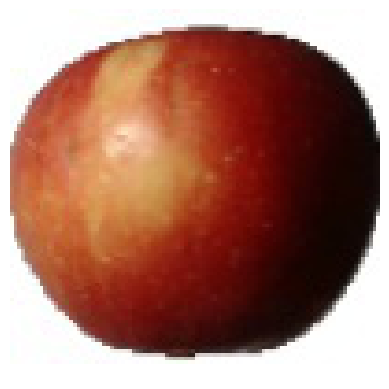

In [3]:
train_path = "/Users/erdemsevinc/Desktop/python/WEEK 11/fruits-360_dataset/fruits-360/Training/"
test_path = "/Users/erdemsevinc/Desktop/python/WEEK 11/fruits-360_dataset/fruits-360/Test/"

img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show

In [4]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [5]:
className = glob(train_path + '/*')
numberOfClass = len(className)
print("NumberOfClass:", numberOfClass)

NumberOfClass: 131


# CNN Model

In [6]:
model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape = x.shape))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Convolution2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Convolution2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

batch_size = 32


train_datagen = ImageDataGenerator(rescale= 1./255,
                    shear_range = 0.3,
                    horizontal_flip = True,
                    zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=x.shape[:2],
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical"
)




test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=x.shape[:2],
    batch_size = batch_size,
    class_mode='categorical',
    color_mode = "rgb"
)


hist = model.fit(train_generator, epochs=2, steps_per_epoch=1600 // batch_size, validation_data = test_generator, validation_steps = 800// batch_size)



/Users/erdemsevinc/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/2


/Users/erdemsevinc/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.0143 - loss: 4.8690 - val_accuracy: 0.0050 - val_loss: 4.7890
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.0262 - loss: 4.7854 - val_accuracy: 0.0262 - val_loss: 4.5329


# MODEL SAVE

In [7]:
model.save_weights("deneme.weights.h5")

# MODEL EVALUATION

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


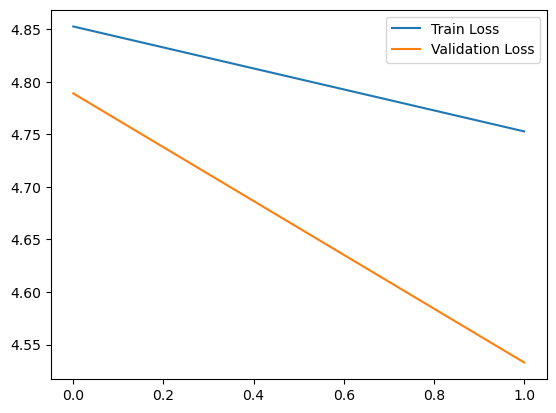

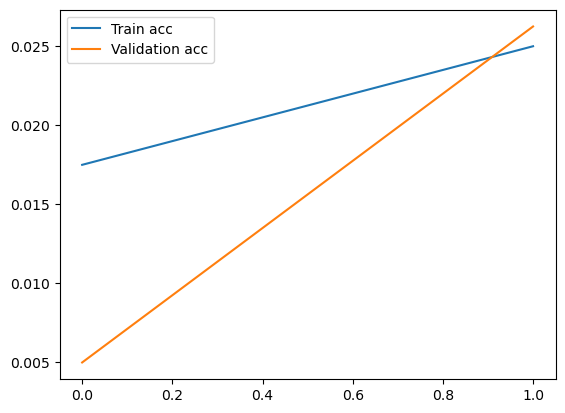

In [8]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "Train Loss")
plt.plot(hist.history["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.plot(hist.history["accuracy"],label = "Train acc")
plt.plot(hist.history["val_accuracy"],label = "Validation acc")
plt.legend()
plt.show()




# SAVE HISTORY

In [9]:
import json
with open("deneme.json","w") as f:
    json.dump(hist.history, f)

# LOAD HISTORY

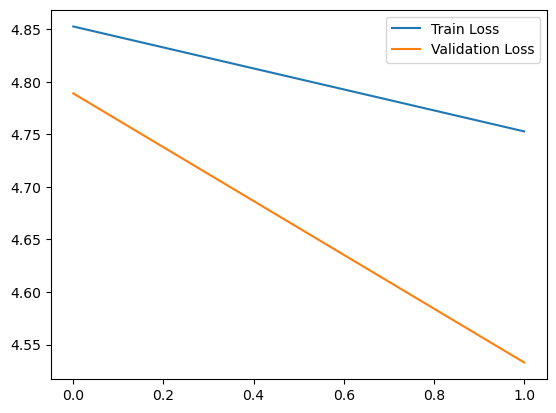

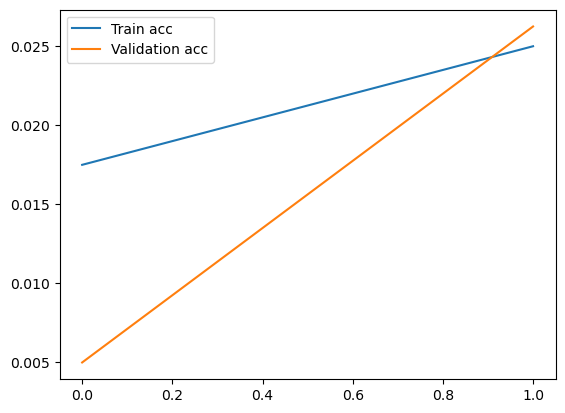

In [10]:
import codecs
with codecs.open("deneme.json","r",encoding = "utf-8") as f:
    h = json.loads(f.read())
plt.plot(h["loss"],label = "Train Loss")
plt.plot(h["val_loss"],label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"],label = "Train acc")
plt.plot(h["val_accuracy"],label = "Validation acc")
plt.legend()
plt.show()
